# ForceAtlas2 for materials graphs

### Import data and normalize

In [1]:
import pandas as pd
import numpy as np

In [2]:
materials = pd.read_csv("../Data/model_output_all_kpoint_total_dos_epoch_401_432_batches.csv", header=None, index_col=0).T
materials_normalised = materials.apply(lambda col: col/col.sum())
[num for num in materials_normalised.isna().sum() if num != 0]

[]

### Get cumulative distributions and adjacency matrix

In [3]:
import tqdm
from tqdm import trange

In [4]:
cumul_materials = materials_normalised.apply(lambda col: col.cumsum())
cumul_materials

,mp-1217193,mp-675230,mp-710,mp-20753,mp-7128,mp-1009878,mp-1216447,mvc-7237,mp-3886,mp-569790,...,mp-30465,mp-12996,mp-1187519,mp-862423,mp-23199,mp-1079697,mp-8436,mp-1028488,mp-30377,mp-16264
1,0.000007,0.000010,0.000004,0.000031,0.000269,0.000038,0.000019,0.000016,0.000007,0.000005,...,0.000002,0.000003,0.000029,0.000002,6.810057e-07,0.000011,0.000007,0.000011,0.000002,0.000008
2,0.000014,0.000020,0.000008,0.000062,0.000561,0.000072,0.000036,0.000033,0.000013,0.000009,...,0.000003,0.000006,0.000057,0.000005,1.375161e-06,0.000022,0.000014,0.000023,0.000005,0.000015
3,0.000021,0.000029,0.000012,0.000093,0.000882,0.000102,0.000053,0.000053,0.000019,0.000014,...,0.000005,0.000009,0.000085,0.000008,2.134496e-06,0.000033,0.000020,0.000035,0.000007,0.000022
4,0.000029,0.000037,0.000017,0.000125,0.001231,0.000130,0.000069,0.000074,0.000025,0.000019,...,0.000006,0.000011,0.000113,0.000011,3.079194e-06,0.000045,0.000027,0.000047,0.000010,0.000029
5,0.000037,0.000046,0.000022,0.000160,0.001597,0.000157,0.000086,0.000098,0.000032,0.000025,...,0.000008,0.000014,0.000143,0.000014,4.249017e-06,0.000057,0.000034,0.000062,0.000012,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.999524,0.999161,0.998549,0.999045,0.998982,0.996541,0.999398,0.998615,0.999357,0.998284,...,0.998352,0.999161,0.999282,0.999120,9.976469e-01,0.999169,0.999379,0.999680,0.999468,0.999547
513,0.999762,0.999550,0.998945,0.999497,0.999450,0.997419,0.999676,0.999227,0.999615,0.999138,...,0.999240,0.999639,0.999713,0.999501,9.990955e-01,0.999524,0.999671,0.999829,0.999711,0.999777
514,0.999928,0.999761,0.999224,0.999776,0.999771,0.997943,0.999874,0.999670,0.999795,0.999687,...,0.999657,0.999860,0.999933,0.999727,9.997984e-01,0.999761,0.999853,0.999935,0.999854,0.999914
515,0.999970,0.999918,0.999682,0.999914,0.999907,0.999181,0.999947,0.999860,0.999917,0.999876,...,0.999890,0.999950,0.999977,0.999894,9.999344e-01,0.999899,0.999940,0.999972,0.999945,0.999968


In [5]:
cols = cumul_materials.columns
idx = cols.copy()
cumul_mat = cumul_materials.to_numpy(dtype=float, na_value=np.nan, copy=False)

In [6]:
half_diff_mat = np.empty((cumul_mat.shape[1], cumul_mat.shape[1]))
half_diff_mat.fill(0)

# for i in trange(half_diff_mat.shape[0]):
#     for j in range(i+1, half_diff_mat.shape[1]):
#         half_diff_mat[i][j] = sum(abs(cumul_mat[:,i] - cumul_mat[:,j]))

no_calcs = half_diff_mat.shape[1]-1
for j in trange(no_calcs):
    half_diff_mat[j,-no_calcs+j:] = sum(abs(
        cumul_mat[:,j+1:] - np.expand_dims(cumul_mat[:,j], axis=1)
    ))

100%|██████████| 3450/3450 [00:35<00:00, 98.56it/s] 


In [7]:
half_diff_mat

array([[ 0.        , 16.43789275, 21.60419868, ..., 15.58461068,
        13.08699757, 25.32870736],
       [ 0.        ,  0.        , 14.67090449, ..., 19.23761512,
        19.6440093 , 18.54367807],
       [ 0.        ,  0.        ,  0.        , ..., 32.20404856,
        24.70039603,  5.92536344],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        13.37334664, 36.15547543],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 28.6940291 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [8]:
diff_mat = half_diff_mat + half_diff_mat.T
adj_mat = 1 / diff_mat
np.fill_diagonal(adj_mat, 0)
adj_df = pd.DataFrame(adj_mat, index=idx, columns=cols)
adj_df

C:\Users\Camilo\AppData\Local\Temp\ipykernel_28340\2636064887.py:2: RuntimeWarning: divide by zero encountered in true_divide
  adj_mat = 1 / diff_mat


,mp-1217193,mp-675230,mp-710,mp-20753,mp-7128,mp-1009878,mp-1216447,mvc-7237,mp-3886,mp-569790,...,mp-30465,mp-12996,mp-1187519,mp-862423,mp-23199,mp-1079697,mp-8436,mp-1028488,mp-30377,mp-16264
0,,,,,,,,,,,,,,,,,,,,,
mp-1217193,0.000000,0.060835,0.046287,0.102728,0.051432,0.050387,0.154325,0.055422,0.045319,0.044004,...,0.121830,0.068818,0.018192,0.090893,0.035578,0.109708,0.072025,0.064166,0.076412,0.039481
mp-675230,0.060835,0.000000,0.068162,0.073550,0.033438,0.068037,0.060312,0.049465,0.061064,0.041471,...,0.043699,0.046225,0.016452,0.055442,0.057283,0.073182,0.055737,0.051981,0.050906,0.053927
mp-710,0.046287,0.068162,0.000000,0.053070,0.026684,0.144136,0.045824,0.032500,0.216789,0.026302,...,0.036288,0.041895,0.013331,0.056911,0.035337,0.051555,0.034540,0.031052,0.040485,0.168766
mp-20753,0.102728,0.073550,0.053070,0.000000,0.045125,0.063482,0.090474,0.069244,0.052673,0.043726,...,0.073990,0.093353,0.016660,0.075599,0.045031,0.190750,0.073557,0.057555,0.089704,0.044071
mp-7128,0.051432,0.033438,0.026684,0.045125,0.000000,0.027202,0.048574,0.070066,0.025636,0.062803,...,0.069498,0.038459,0.025405,0.034526,0.024993,0.047800,0.058274,0.060517,0.064966,0.024248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-1079697,0.109708,0.073182,0.051555,0.190750,0.047800,0.060780,0.107617,0.074706,0.052526,0.047304,...,0.089514,0.100502,0.017109,0.079413,0.041787,0.000000,0.085028,0.063848,0.122183,0.042382
mp-8436,0.072025,0.055737,0.034540,0.073557,0.058274,0.036055,0.076235,0.110556,0.033079,0.097156,...,0.086304,0.058010,0.020874,0.047051,0.035916,0.085028,0.000000,0.203059,0.082182,0.029896
mp-1028488,0.064166,0.051981,0.031052,0.057555,0.060517,0.031656,0.070230,0.090147,0.029219,0.111831,...,0.069765,0.047264,0.022236,0.041879,0.032730,0.063848,0.203059,0.000000,0.074776,0.027658


### -------sample with few materials-------

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'mp-567600')

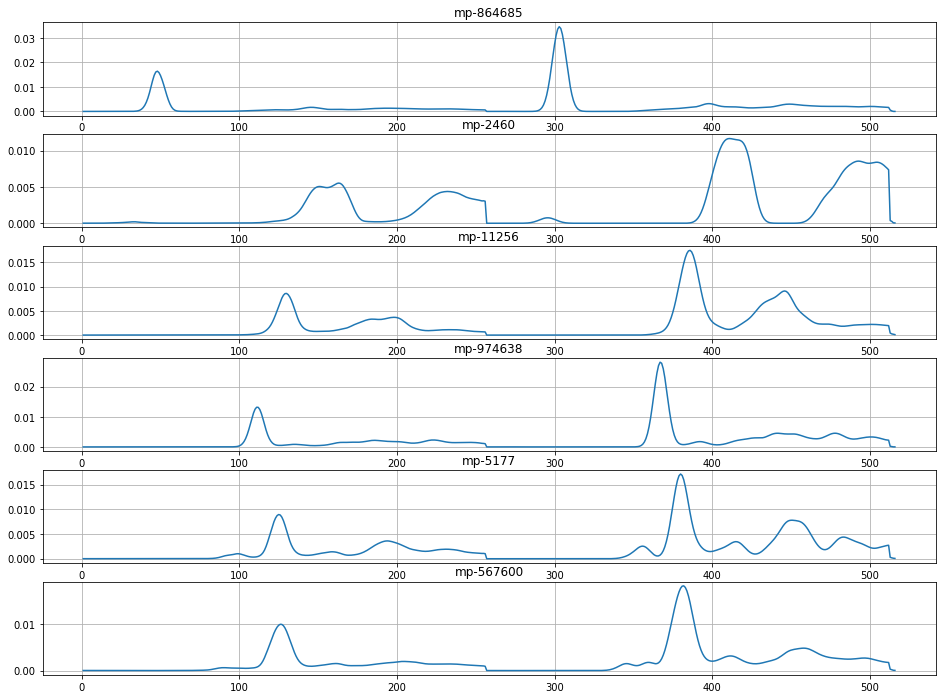

In [6]:
plt.figure(figsize=(16,12))
sample_materials_normalised = materials_normalised.sample(n=6, axis='columns', random_state=6)

plt.subplot(611)
plt.plot(sample_materials_normalised.iloc[:,0])
plt.grid()
plt.title(sample_materials_normalised.columns.values[0])
plt.subplot(612)
plt.plot(sample_materials_normalised.iloc[:,1])
plt.grid()
plt.title(sample_materials_normalised.columns.values[1])
plt.subplot(613)
plt.plot(sample_materials_normalised.iloc[:,2])
plt.grid()
plt.title(sample_materials_normalised.columns.values[2])
plt.subplot(614)
plt.plot(sample_materials_normalised.iloc[:,3])
plt.grid()
plt.title(sample_materials_normalised.columns.values[3])
plt.subplot(615)
plt.plot(sample_materials_normalised.iloc[:,4])
plt.grid()
plt.title(sample_materials_normalised.columns.values[4])
plt.subplot(616)
plt.plot(sample_materials_normalised.iloc[:,5])
plt.grid()
plt.title(sample_materials_normalised.columns.values[5])

In [7]:
sample_cumul_materials = sample_materials_normalised.apply(lambda col: col.cumsum())
sample_cumul_materials

,mp-864685,mp-2460,mp-11256,mp-974638,mp-5177,mp-567600
1,0.000003,0.000011,0.000004,0.000002,0.000010,0.000018
2,0.000006,0.000022,0.000008,0.000003,0.000020,0.000036
3,0.000009,0.000034,0.000013,0.000005,0.000030,0.000054
4,0.000013,0.000047,0.000017,0.000007,0.000039,0.000073
5,0.000017,0.000061,0.000021,0.000010,0.000047,0.000092
...,...,...,...,...,...,...
512,0.999182,0.999256,0.999060,0.999665,0.999365,0.999428
513,0.999765,0.999630,0.999483,0.999870,0.999653,0.999718
514,0.999973,0.999892,0.999730,0.999970,0.999833,0.999896
515,0.999993,0.999955,0.999901,0.999989,0.999935,0.999960


In [8]:
sample_cols = sample_cumul_materials.columns
sample_idx = sample_cols.copy()
sample_cumul_mat = sample_cumul_materials.to_numpy(dtype=float, na_value=np.nan, copy=False)

sample_diff_mat = np.empty((sample_cumul_mat.shape[1], sample_cumul_mat.shape[1]))
sample_diff_mat.fill(0)

for i in trange(sample_diff_mat.shape[0]):
    for j in range(i+1, sample_diff_mat.shape[1]):
        sample_diff_mat[i][j] = sum(abs(sample_cumul_mat[:,i] - sample_cumul_mat[:,j]))

100%|██████████| 6/6 [00:00<00:00, 5979.05it/s]


In [9]:
sample_adj_mat = sample_diff_mat + sample_diff_mat.T
sample_adj_df = pd.DataFrame(sample_adj_mat, index=sample_idx, columns=sample_cols)
sample_adj_df

,mp-864685,mp-2460,mp-11256,mp-974638,mp-5177,mp-567600
0,,,,,,
mp-864685,0.000000,80.850108,61.707459,50.937709,59.233045,49.635758
mp-2460,80.850108,0.000000,27.264559,34.276468,24.940192,34.108979
mp-11256,61.707459,27.264559,0.000000,15.996521,9.512514,15.460082
mp-974638,50.937709,34.276468,15.996521,0.000000,10.688893,11.310740
mp-5177,59.233045,24.940192,9.512514,10.688893,0.000000,10.084767
mp-567600,49.635758,34.108979,15.460082,11.310740,10.084767,0.000000


In [13]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

In [107]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True
)
sample_positions = forceatlas2.forceatlas2(sample_adj_df.to_numpy(), pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:00<00:00, 60553.58it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


In [108]:
sample_node_positions = {sample_adj_df.columns.values[i]: sample_positions[i] for i in range(len(sample_adj_df))}
sample_node_positions

{'mp-864685': (0.07291589722342508, -0.5459825548395713),
 'mp-2460': (-0.7833003957081653, -1.1976577569422986),
 'mp-11256': (0.8611189763557414, 0.7166891376173934),
 'mp-974638': (1.6759744755707155, -0.6392342070501329),
 'mp-5177': (-1.5528428944371508, 0.5005369369110626),
 'mp-567600': (0.19532818452685924, -2.382723799995907)}

In [109]:
sample_G = nx.from_pandas_adjacency(sample_adj_df)

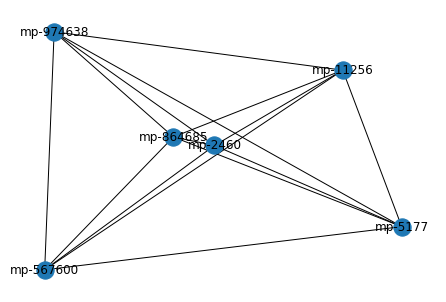

In [31]:
# nx.draw_networkx_nodes(sample_G, sample_node_positions, node_size=300, node_color="blue", alpha=0.4)
# nx.draw_networkx_edges(sample_G, sample_node_positions, edge_color="green", alpha=0.006)
nx.draw(sample_G, sample_node_positions, with_labels=True)
plt.axis('off')
plt.show()

#### Testing normalizing and then doing (1-item) as weight

In [143]:
sample_diff_weight_adj_mat = ((1-sample_adj_mat/516) - 0.8)*10
np.fill_diagonal(sample_diff_weight_adj_mat, 0)
sample_diff_weight_adj_mat

array([[0.        , 0.43313744, 0.804119  , 1.0128351 , 0.85207278,
        1.03806671],
       [0.43313744, 0.        , 1.47161708, 1.33572737, 1.51666295,
        1.33897327],
       [0.804119  , 1.47161708, 0.        , 1.6899899 , 1.81564895,
        1.700386  ],
       [1.0128351 , 1.33572737, 1.6899899 , 0.        , 1.79285091,
        1.78079962],
       [0.85207278, 1.51666295, 1.81564895, 1.79285091, 0.        ,
        1.80455877],
       [1.03806671, 1.33897327, 1.700386  , 1.78079962, 1.80455877,
        0.        ]])

In [144]:
sample_diff_weight_adj_df = pd.DataFrame(sample_diff_weight_adj_mat, index=sample_idx, columns=sample_cols)
# sample_diff_weight_adj_df[sample_diff_weight_adj_df < 0.95] = 0
sample_diff_weight_adj_df

,mp-864685,mp-2460,mp-11256,mp-974638,mp-5177,mp-567600
0,,,,,,
mp-864685,0.000000,0.433137,0.804119,1.012835,0.852073,1.038067
mp-2460,0.433137,0.000000,1.471617,1.335727,1.516663,1.338973
mp-11256,0.804119,1.471617,0.000000,1.689990,1.815649,1.700386
mp-974638,1.012835,1.335727,1.689990,0.000000,1.792851,1.780800
mp-5177,0.852073,1.516663,1.815649,1.792851,0.000000,1.804559
mp-567600,1.038067,1.338973,1.700386,1.780800,1.804559,0.000000


100%|██████████| 2000/2000 [00:00<00:00, 62496.61it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


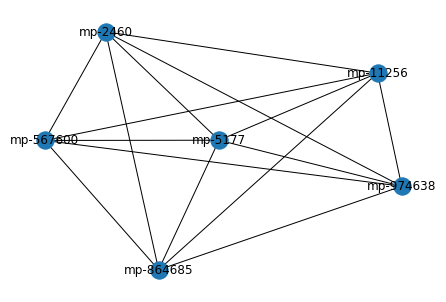

In [147]:
sample_diff_weight_positions = forceatlas2.forceatlas2(sample_diff_weight_adj_df.to_numpy(), pos=None, iterations=2000)
sample_diff_weight_node_positions = {sample_diff_weight_adj_df.columns.values[i]: sample_diff_weight_positions[i] for i in range(len(sample_diff_weight_adj_df))}
sample_diff_weight_G = nx.from_pandas_adjacency(sample_diff_weight_adj_df)
nx.draw(sample_diff_weight_G, sample_diff_weight_node_positions, with_labels=True)
plt.axis('off')
plt.show()

### -------from here continue regularly-------

### Calculate ForceAtlas2 positions

In [9]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

In [10]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True
)
positions = forceatlas2.forceatlas2(adj_df.to_numpy(), pos=None, iterations=2000)

100%|██████████| 2000/2000 [06:03<00:00,  5.50it/s]

BarnesHut Approximation  took  57.70  seconds
Repulsion forces  took  166.42  seconds
Gravitational forces  took  0.59  seconds
Attraction forces  took  132.52  seconds
AdjustSpeedAndApplyForces step  took  2.54  seconds


In [11]:
node_positions = {adj_df.columns.values[i]: positions[i] for i in range(len(adj_df))}
node_positions

{'mp-1217193': (3018.621843578548, -8969.614686838455),
 'mp-675230': (10613.376402214959, 14048.764965609156),
 'mp-710': (22296.09143030811, 6698.877329177432),
 'mp-20753': (6385.234216059721, 3390.283709547479),
 'mp-7128': (-17183.210875383847, -5097.259301521599),
 'mp-1009878': (20667.290397536904, 4517.00814845853),
 'mp-1216447': (1989.0722245865013, 699.1958363027246),
 'mvc-7237': (-9582.213806741174, 3878.504332496133),
 'mp-3886': (22726.281076062707, 1746.0462208218594),
 'mp-569790': (-16741.283833344296, 7087.008541413766),
 'mp-24420': (-1233.0851640471303, 16888.871139701874),
 'mp-29008': (36273.953392435295, 26342.368744415697),
 'mp-1025729': (55.22798751336255, 6933.438023431603),
 'mp-2455': (-8468.015433984478, 2150.4756433511993),
 'mp-1027152': (-93.3229212125984, 6228.842485450752),
 'mp-1020108': (13635.215305071273, 18438.477392919576),
 'mp-10260': (-1324.546645262773, -17992.014103984464),
 'mvc-700': (-6612.978270979799, -6048.482020621048),
 'mp-571554'

### Filter top percentage edges

In [12]:
adj_mat_no_diag = adj_mat[~np.eye(adj_mat.shape[0],dtype=bool)].reshape(adj_mat.shape[0],-1)

In [13]:
top_percentile = np.percentile(adj_mat_no_diag, 90)
top_percentile

0.08410673010938659

In [14]:
adj_mat_filter = np.copy(adj_mat)
adj_mat_filter[adj_mat_filter < top_percentile] = 0
adj_mat_filter

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16876602],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16876602, ..., 0.        , 0.        ,
        0.        ]])

### Create graph and draw it

In [15]:
adj_df_filter = pd.DataFrame(adj_mat_filter, index=idx, columns=cols)

In [16]:
G = nx.from_pandas_adjacency(adj_df_filter)

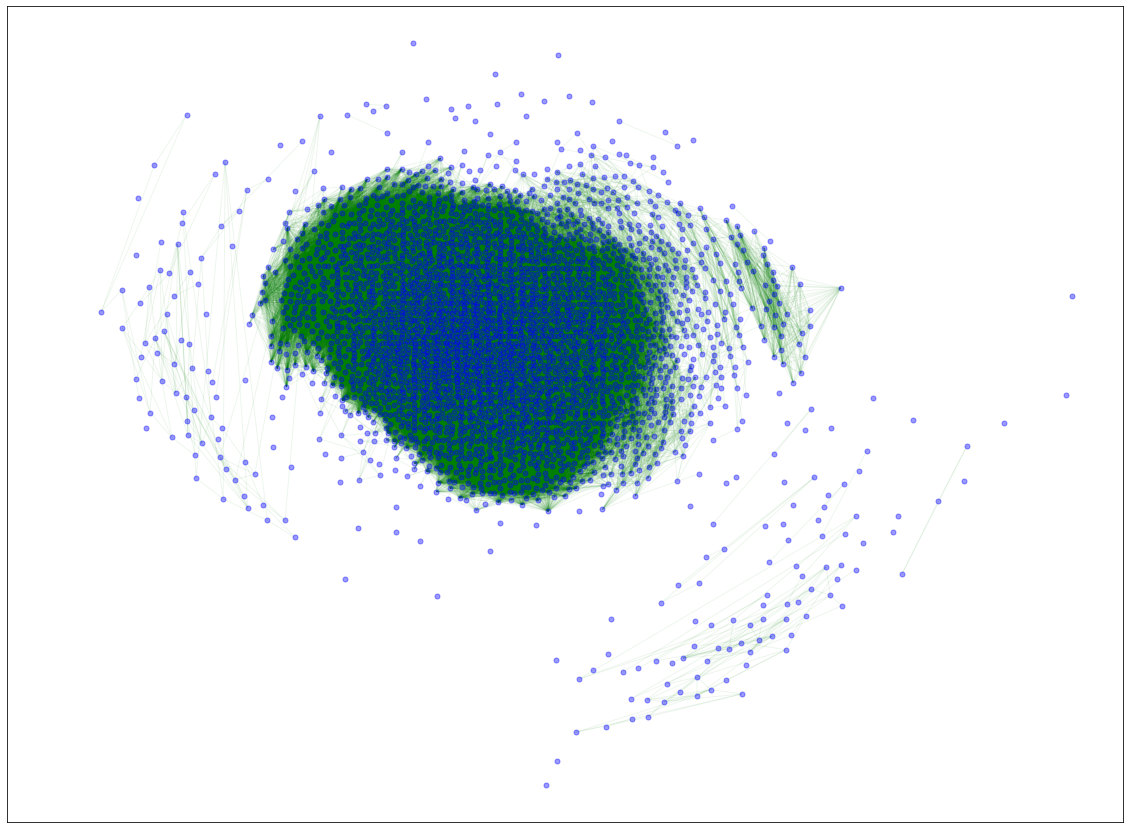

In [34]:
fig = plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(G, node_positions, node_size=25, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, node_positions, edge_color="green", alpha=0.07)
# plt.axis('off')
plt.show()

### plotly

In [17]:
import plotly.graph_objects as go

In [19]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = node_positions[edge[0]]
    x1, y1 = node_positions[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = node_positions[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


In [29]:
#################
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0] +' - # of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
################"

In [ ]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Network graph made with Python',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        annotations=[dict(
            text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002 )],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    ),
)
fig.update_layout(width=1300)
fig.update_layout(height=1000)
fig.show()